In [56]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import *
from sympsi import *
from sympsi.boson import *
from sympsi.pauli import *
from sympsi.expectation import *
from sympsi.operatorordering import *
from sympsi.operator import OperatorFunction
from sympy.solvers.ode import _linear_neq_order1_type1

In [57]:
fr0 = 6e9  #resonator frequency
Om_r = fr0*2*np.pi
OmQ = 5.3e9 #qubit frequency from experiment

e = 1.6e-19

Ck = 5e-15
Cg = 2e-15
Cq = 90e-15
Cr = 500e-15
Lr = 2e-9
Cs = 50e-15 #чиселко из ниоткуда, но большое

Csum = Cg + Cs

E_C = 200e6  
E_J_max = (5.3e9+E_C)**2/(8*E_C) #from frequency at sweet spot
a = 10  #inequality of Josephson junctions
E_J1 = E_J_max/(1+a)
E_J2 = a*E_J1
E_J = E_J1+E_J2

Vrms = np.sqrt(Om_r/2/Cr)
beta = Cg/Csum
Cog = (E_C/8/E_J)**(1/4)

g01 = 2*beta*e*Vrms*Cog*np.sqrt(1/2)
g12 = 2*beta*e*Vrms*Cog

chi01 = g01/(OmQ-Om_r)
chi12 = g12/(OmQ-E_C-Om_r)

In [58]:
Om_r_sh = Om_r - chi12/2
Om_q = (OmQ + chi12)/2
chi = chi01-chi12/2

In [59]:
aa = Matrix([[1,0],[0,2]])
sz = Matrix([[1,0],[0,-1]])
I = Matrix([[1,0],[0,1]])

H = Om_q*sz + (Om_r_sh*I + chi*sz)*aa
H[1,1]/1e10

E = H.eigenvals()
E1 = 16139644737231./400
E2 = 14549644737231/200
list(E)

[16139644737231/400, 14549644737231/200]

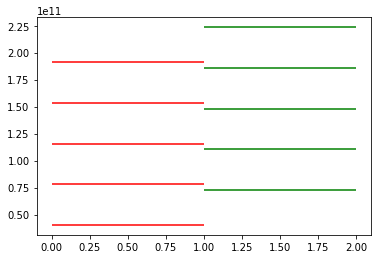

In [60]:
fig, ax = plt.subplots()

for i in range(0,5):
    ax.hlines(E1+(Om_r+chi01)*i, 0, 1, color = 'r')
    ax.hlines(E2+(Om_r+chi01-chi12/2)*i, 1, 2 , color = 'green')

    

plt.show()